## ABSTRACT

To expand the basic code for building a DNN on the Pima Indian Diabetic Dataset to include:

(a) pre-process the data by scaling/standardizing the 8 columns

(b) Split the entire dataset into three parts instead of two as we currently do. One is train, two is validation, and then a test set. Build DNN model with train data, tune hyper parameters with validation data, and finally evaluate performance on the test data.

(c) Make Epoch versus train set accuracy, and validation set accuracy

(d) Report results using nice ROC curves, report AUC values. Feel free to use code form our course,or from elsewhere

To train, tune and evaluate DNN model for the Black Friday sales Dataset. https://www.kaggle.com/mehdidag/black-friday. It’s a regression problem and you need only one neuron in the final layer!!! Try all the above steps (for problem 1) on this one too.

## About the dataset "BLACK FRIDAY SALES DATASET"

Introduction: This project is analyse the data of Black Friday sales and get more insights to answer the key business questions as below.

1.What are maximum products sold

2.Which Product category has highest sales

3. Finding the buyer's age group and their product of intreset

4.Finding the marital status of the buyers

5.Analysing the gender group, which has high intrest in the sales

Table of Contents Installation Types of Files Results

## PART 2

1. Understand the problem and read in the data

2. Pre-process data, train-test split

3. Build and compile a deep learning model

## Understand the problem and read in the data

In [0]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [11]:
%pwd

'/content'

In [12]:
!ls

BlackFriday.csv  sample_data


In [13]:
df = pd.read_csv('BlackFriday.csv')
print(df.shape)
df.head(2)

(537577, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


## Performing EDA

In [14]:
#the min and max values
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [15]:
#View first few records
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [16]:
#view last few records
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [17]:
#Look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


We are able to find three different datatypes as
2 columns with float64
5 columns with int64
5 columns with object

Gender & City_Category are categorical (Nominal) variables, Age column has values in grouped manner. we need to preprocess them, which we can see in the later section Quick Insights on the data types The Data types are classified into two as Quantitative and Categorical Quantitative data takes on numeric values that allow us to perform mathematical operations (like the number of dogs). Categorical are used to label a group or set of items (like dog breeds - Collies, Labs, Poodles, etc.).

Categorical Ordinal vs. Categorical Nominal We can divide categorical data further into two types: Ordinal and Nominal. Categorical Ordinal data take on a ranked ordering (like a ranked interaction on a scale from Very Poor to Very Good with the dogs). Categorical Nominal data do not have an order or ranking (like the breeds of the dog).

Continuous vs. Discrete We can think of quantitative data as being either continuous or discrete. Continuous data can be split into smaller and smaller units, and still a smaller unit exists. An example of this is the age of the dog - we can measure the units of the age in years, months, days, hours, seconds, but there are still smaller units that could be associated with the age. Discrete data only takes on countable values. The number of dogs we interact with is an example of a discrete data type. More details refer wiki and a very good Medium post.

## DATA ANALYSIS

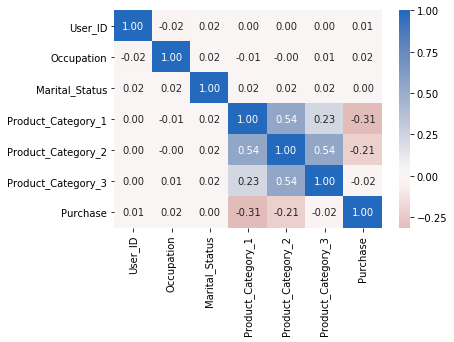

In [18]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

Product_Category_1, Product_Category_2 & Product_Category_3 correlation vale >.5 which is moderate.

In [19]:
#Insights on NaN values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

we are able to see more null values in Product_Category_2 and Product_Category_3, let us check the value counts for each category.

In [20]:
#Let us check the values counts on product category trend
df["Product_Category_1"].value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

In [21]:
df["Product_Category_2"].value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

In [22]:
df["Product_Category_3"].value_counts()

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: Product_Category_3, dtype: int64

In [0]:
# Deep copy the original data frame, so that changes made in copy will not impact the original version
df_copy = df.copy()

In [24]:
print ("Shape of Original df:{}".format(df.shape))
print ("Shape of Copy df_copy:{}".format(df_copy.shape))

Shape of Original df:(537577, 12)
Shape of Copy df_copy:(537577, 12)


Now let us drop the NaN values in the copied dataframe to see how much data loss we have.

In [0]:
df_copy.dropna(inplace=True)

In [26]:
print ("Shape of Original df:{}".format(df.shape))
print ("Shape of Copy df_copy:{}".format(df_copy.shape))

Shape of Original df:(537577, 12)
Shape of Copy df_copy:(164278, 12)


In [27]:
df_copy[["Product_ID","Product_Category_1","Product_Category_2","Product_Category_3"]].head()

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
1,P00248942,1,6.0,14.0
6,P00184942,1,8.0,17.0
13,P00145042,1,2.0,5.0
14,P00231342,5,8.0,14.0
16,P0096642,2,3.0,4.0


In [28]:
print("Shape of the original data set : {}".format(df.shape))
print("Shape of the NaN removed data set : {}".format(df_copy.shape))

Shape of the original data set : (537577, 12)
Shape of the NaN removed data set : (164278, 12)


In [29]:
#df_copy.dropna().shape[0]/df_copy.shape[0]
print ("Propotion of missing values in df :{0:.2f}".format((df.shape[0] - df_copy.shape[0])/df.shape[0]))

Propotion of missing values in df :0.69


#### Removing the NaN values is resulting in loss of 70% data in the data set. This results in bias-ed model causing the model to be underfit.

The available alternate approaches are imputing the missing values with mean, mode or fill with 0. since the Product_Catgeory_2 & Product_Catgeory_3 coulmns are interlinked with values present in Product_Catgeory_1, hence imputing with mean/mode is not a good strategy, hence we will fill the Nan values with 0.

In [0]:
#Fill na with Zero
df.fillna(0, inplace=True)

In [31]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

There is no NaN values in the dataset, which is ready for further analysis now !!!

## Handling non numeric values

In [32]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
print(df.head())

   User_ID  Product_ID  ...  Product_Category_3  Purchase
0  1000001        1414  ...                 0.0      8370
1  1000001         122  ...                14.0     15200
2  1000001        1553  ...                 0.0      1422
3  1000001         836  ...                 0.0      1057
4  1000002        2199  ...                 0.0      7969

[5 rows x 12 columns]


Now the dataset is completely ready for further processing!

## Pre-process data, train-test and validation split

### Splitting the data into train, test and validation sets

In [0]:
#Separate out X and Y

X = df.iloc[:, :11]
y = df.iloc[:, 11:12]

## Scaling the data by using standard scalar

In [0]:
#Since variables have varied scale, we would rescale all of them, using Standard Scalar
#StandardScalar subtracts mean from all the values and divide by SD, so we scale all the values to mean = 0 and sd = 1

from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

In [35]:
sc= StandardScaler()
X_scaled =pd.DataFrame(sc.fit_transform(X))

X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.744554,-0.380632,1.751138,0.175513,0.293877,1.410677,0.212523,-0.831545,-0.612032,-1.092294,-0.617906
1,-1.744554,-1.624197,1.751138,0.175513,0.293877,1.410677,0.212523,-0.831545,-1.145266,-0.126361,1.616389
2,-1.744554,-0.246843,1.751138,0.175513,0.293877,1.410677,0.212523,-0.831545,1.787522,-1.092294,-0.617906
3,-1.744554,-0.936964,1.751138,0.175513,0.293877,1.410677,0.212523,-0.831545,1.787522,1.161549,-0.617906
4,-1.743970,0.374939,-0.571057,1.144599,1.213543,0.186414,0.987202,-0.831545,0.721053,-1.092294,-0.617906


In [0]:
(X_train, X_test, y_train, y_test) = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1)
(X_train, X_val, y_train, y_val) = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

n this way, train, val, test set will be 60%, 20%, 20% of the dataset respectively

In [37]:
print(X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape)

(322545, 11) (107516, 11) (107516, 11) (322545, 1) (107516, 1) (107516, 1)


## Build and compile a deep learning model

In [38]:
# Build the deep neural network
model = Sequential()
model.add(Dense(11, input_dim=11, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform')) #Since its a regression problem, there is no need of activation for the output.
   

W0809 01:49:37.697913 140333417551744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, input_dim=11, activation="relu", kernel_initializer="uniform")`
  
W0809 01:49:37.761697 140333417551744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 01:49:37.772171 140333417551744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update 

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import numpy as np
import pandas as pd

Since its a regression problem, the log loss function that we will be using would be the "mean-squared-error" instead on binary_classifierentropy.

In [0]:
# Compile the DNN

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [0]:
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 322545 samples, validate on 107516 samples
Epoch 1/25
322545/322545 [==============================] - 82s 253us/step - loss: 12142804.2178 - acc: 9.3010e-05 - val_loss: 11987409.6504 - val_acc: 3.7204e-05
Epoch 2/25
322545/322545 [==============================] - 80s 249us/step - loss: 12119190.8127 - acc: 7.7509e-05 - val_loss: 11968404.3845 - val_acc: 9.3009e-05
Epoch 3/25
322545/322545 [==============================] - 81s 250us/step - loss: 12099807.6118 - acc: 1.0541e-04 - val_loss: 11947015.3790 - val_acc: 7.4408e-05
Epoch 4/25
322545/322545 [==============================] - 81s 251us/step - loss: 12081330.0591 - acc: 1.1161e-04 - val_loss: 11969443.8827 - val_acc: 9.3009e-05
Epoch 5/25
322545/322545 [==============================] - 82s 253us/step - loss: 12059475.6372 - acc: 9.6111e-05 - val_loss: 11886819.5941 - val_acc: 8.3708e-05
Epoch 6/25
322545/322545 [==============================] - 80s 249us/step - loss: 12045822.1073 - acc: 9.9211e-05 - val_loss: 119798

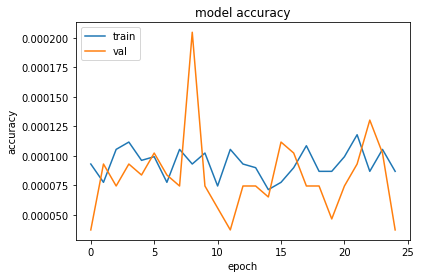

In [69]:
# Fit the DNN with your train data

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), nb_epoch=25, batch_size=5)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc = 'upper left')
plt.show()

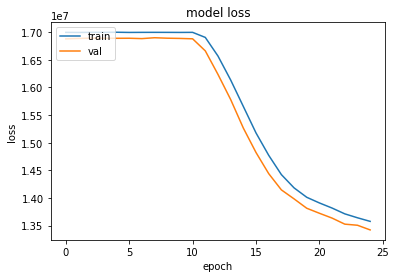

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Summary: 
To find out if their model is overfitting, data scientists use a technique called cross-validation, where they split their data into two parts - the training set, and the validation set. The training set is used to train the model, while the validation set is only used to evaluate the model's performance.

Metrics on the training set let you see how your model is progressing in terms of it's training, but it's metrics on the validation set that let you get a measure of the quality of your model - how well it's able to make new predictions based on data it hasn't seen before.

With this in mind, loss and acc are measures of loss and accuracy on the training set, while val_loss and val_acc are measures of loss and accuracy on the validation set.
At the moment the dnn model has an accuracy of ~0.0225% on the training set and ~0.0200% on the validation set. This means that you can expect your model to perform with ~0.0200% accuracy on new data.

I notice that as your epochs goes from 10 to 15, your acc metric increases, while your val_acc metric decreases. This means that your model is fitting the training set better, but is losing it's ability to predict on new data, indicating that your model is starting to fit on noise and is beginning to overfit.

### Evaluating the model on the test set

In [45]:
scores = model.evaluate(X_test, y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

107516/107516 [==============================] - 2s 20us/step
Accuracy: 0.01%


### To plot the auc and roc curves

## What are ROC and AUC and what can they do?

Receiver operating characteristic curve a.k.a ROC is a graphic plot illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The critical point here is "binary classifier" and "varying threshold". I will show you how to plot ROC for multi-label classifier by the one-vs-all approach as well.

Area Under the Curve, a.k.a. AUC is the percentage of this area that is under this ROC curve, ranging between 0~1.
What can they do?

ROC is a great way to visualize the performance of a binary classifier, and AUC is one single number to summarize a classifier's performance by assessing the ranking regarding separation of the two classes. The higher, the better.
In the following two sections, I will show you how to plot the ROC and calculate the AUC for Keras classifiers, both binary and multi-label ones.

### ROC, AUC 

#### ANSWER : 

Since this is a regression problem, there is no such thing as an ROC Curve for the dataset. Hence there is no requirement to plot the ROC,AUC curves for this particular dataset.

## Conclusion :

Standard scaler was used in order to pre process the data in order to uniformly scale the complete dataset.It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values). This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

The dataset was divided into three sets : train, test and validation and deep neural network model was built using the train data set by tuning the hyper parameter with the validation data and finally the performance was evaluated on the test data set. The accuracy found was 0.01 %.

The plots of epoch versus the train set accuracy and validation set accuracy as well as epoch versus train set loss and test set loss were plotted and it was found that as epoch goes from 10 to 15, your acc metric increases, while your val_acc metric decreases. This means that your model is fitting the training set better, but is losing it's ability to predict on new data, indicating that your model is starting to fit on noise and is beginning to overfit.

Finally, we cannot plot Receiver operating characteristic (ROC) curve on a regression dataset.

## Contribution Statement :

Did the following :

1. Normal EDA - Replaced all the null values with '0' and handled the non numerical data and converted them into numerical data.

2. Preprocessing of the data using Standard Scaler.

3. Built a DNN model on train set, tuning it on the validation set and testing it on the test set.

Code by self -------- 60%

Code referred ------- 40%

## Citations : 

Standard scaler -------- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Information about DNN ---------- https://skymind.com/wiki/neural-network

Information about dataset ------------ https://www.kaggle.com

information about DNN with regression --------- https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

## License :

Copyright <2019> Ria Rajput Permission is hereby granted, free of charge, to any person obtaining a copy of this notebook and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.